<a href="https://colab.research.google.com/github/Viniciuseel/Censo_Fortaleza_analise_de_Dados_com_Clusterizacao/blob/main/Modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install category_encoders
!pip install mplcursors

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import make_column_selector # biblioteca para evitar as colunas string
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline


In [9]:
# Carregar os dados
data = pd.read_excel("/content/BigDataPy_TstNotOfc.xlsx")
data

,Cod_ID,UDH_Atlas,NOME_UDH,CODMUN6,CODUF,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_tudo,T_FLMED_tudo,T_FLBAS_tudo,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1230440001001,1230440001001,Alagadiço I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
1,1230440001002,1230440001002,Jacareganga I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
2,1230440001003,1230440001003,Farias Brito I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
3,1230440001005,1230440001005,Morro do Ouro ( Cercado do Zé Padre e entorno ),230440,23,62300,2010,72.97,2.15,18.5,...,96.29,43.35,93.07,86.15,0.568,0.683,0.684,0.642,0.800,0.624
4,1230440001006,1230440001006,Vila Velha I,230440,23,62300,2010,69.92,2.60,26.7,...,94.00,46.40,91.42,83.39,0.536,0.625,0.641,0.594,0.749,0.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1230440007258,1230440007258,Bairro do Centro ( Entorno da Praça José de Al...,230440,23,62300,2010,79.38,1.28,9.4,...,96.93,63.60,95.94,94.84,0.821,0.824,0.850,0.823,0.906,0.825
243,1230440007259,1230440007259,Bairro do Centro ( Comunidade Baixa Pau e ento...,230440,23,62300,2010,72.97,2.15,18.5,...,96.29,43.35,93.07,86.15,0.568,0.683,0.684,0.642,0.800,0.624
244,1230440007262,1230440007262,Bairro do Centro : Área Oeste,230440,23,62300,2010,76.90,1.35,12.6,...,97.72,65.33,93.93,81.69,0.750,0.780,0.788,0.770,0.865,0.734
245,1230440007263,1230440007263,Bairro do Centro ( Rua Tenente Benévolo e adja...,230440,23,62300,2010,78.28,1.32,10.7,...,95.47,62.01,92.33,89.11,0.750,0.765,0.797,0.760,0.888,0.751


In [10]:
# OBTENDO AS COLUNAS QUE POSSUEM DADOS NULOS

valores_ausentes = data.isna().sum()
colunas_com_ausentes = valores_ausentes[valores_ausentes > 0]
print(colunas_com_ausentes)

PIND         1
PINDCRI      1
PMPOBCRI     1
RIND         1
T_DES1014    4
dtype: int64


In [11]:
# TRATAMENTO DE DADOS (ATRIBUIÇÃO DA MÉDIA DA COLUNA AOS DADOS NULOS)

# Tratamento de valores ausentes utilizando o simpleImputer com a estratégia mean
from sklearn.impute import SimpleImputer

# Inicializando o imputer com estratégia de imputação como 'mean' (média)
imputer = SimpleImputer(strategy='mean')

# Aplicando a imputação apenas nas colunas com valores ausentes
colunas_com_ausentes = ['PIND', 'PINDCRI', 'PMPOBCRI', 'RIND','T_DES1014']
data_imputado = pd.DataFrame(imputer.fit_transform(data[colunas_com_ausentes]), columns=colunas_com_ausentes)


# Adicionando as colunas imputadas de volta ao conjunto de dados original
data[colunas_com_ausentes] = data_imputado
data


,Cod_ID,UDH_Atlas,NOME_UDH,CODMUN6,CODUF,CODRM,ANO,ESPVIDA,FECTOT,MORT1,...,T_FLFUND_tudo,T_FLMED_tudo,T_FLBAS_tudo,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1230440001001,1230440001001,Alagadiço I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
1,1230440001002,1230440001002,Jacareganga I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
2,1230440001003,1230440001003,Farias Brito I,230440,23,62300,2010,79.90,1.25,8.8,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
3,1230440001005,1230440001005,Morro do Ouro ( Cercado do Zé Padre e entorno ),230440,23,62300,2010,72.97,2.15,18.5,...,96.29,43.35,93.07,86.15,0.568,0.683,0.684,0.642,0.800,0.624
4,1230440001006,1230440001006,Vila Velha I,230440,23,62300,2010,69.92,2.60,26.7,...,94.00,46.40,91.42,83.39,0.536,0.625,0.641,0.594,0.749,0.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,1230440007258,1230440007258,Bairro do Centro ( Entorno da Praça José de Al...,230440,23,62300,2010,79.38,1.28,9.4,...,96.93,63.60,95.94,94.84,0.821,0.824,0.850,0.823,0.906,0.825
243,1230440007259,1230440007259,Bairro do Centro ( Comunidade Baixa Pau e ento...,230440,23,62300,2010,72.97,2.15,18.5,...,96.29,43.35,93.07,86.15,0.568,0.683,0.684,0.642,0.800,0.624
244,1230440007262,1230440007262,Bairro do Centro : Área Oeste,230440,23,62300,2010,76.90,1.35,12.6,...,97.72,65.33,93.93,81.69,0.750,0.780,0.788,0.770,0.865,0.734
245,1230440007263,1230440007263,Bairro do Centro ( Rua Tenente Benévolo e adja...,230440,23,62300,2010,78.28,1.32,10.7,...,95.47,62.01,92.33,89.11,0.750,0.765,0.797,0.760,0.888,0.751


In [12]:
#REMOVENDO COLUNAS DESNECESSARIAS (STRINGS E VALORES CONSTANTES)

data.drop(columns=['CODMUN6','CODUF','ANO','CODRM','Cod_ID','UDH_Atlas'], inplace=True)

In [13]:
# VIZUALIZAÇÃO DO DF TRATADO
data = pd.DataFrame(data)
data

,NOME_UDH,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,...,T_FLFUND_tudo,T_FLMED_tudo,T_FLBAS_tudo,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,Alagadiço I,79.90,1.25,8.8,10.23,96.85,89.17,33.53,8.98,11.90,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
1,Jacareganga I,79.90,1.25,8.8,10.23,96.85,89.17,36.23,10.93,11.90,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
2,Farias Brito I,79.90,1.25,8.8,10.23,96.85,89.17,34.77,11.99,11.90,...,100.00,72.43,97.69,100.00,0.864,0.874,0.874,0.871,0.915,0.837
3,Morro do Ouro ( Cercado do Zé Padre e entorno ),72.97,2.15,18.5,19.85,95.69,79.80,58.15,11.34,10.08,...,96.29,43.35,93.07,86.15,0.568,0.683,0.684,0.642,0.800,0.624
4,Vila Velha I,69.92,2.60,26.7,28.72,93.83,75.94,49.71,3.36,9.59,...,94.00,46.40,91.42,83.39,0.536,0.625,0.641,0.594,0.749,0.592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,Bairro do Centro ( Entorno da Praça José de Al...,79.38,1.28,9.4,10.95,96.81,88.56,36.38,12.57,11.56,...,96.93,63.60,95.94,94.84,0.821,0.824,0.850,0.823,0.906,0.825
243,Bairro do Centro ( Comunidade Baixa Pau e ento...,72.97,2.15,18.5,19.85,95.69,79.80,50.36,6.37,10.08,...,96.29,43.35,93.07,86.15,0.568,0.683,0.684,0.642,0.800,0.624
244,Bairro do Centro : Área Oeste,76.90,1.35,12.6,14.62,96.51,85.03,36.05,8.41,11.26,...,97.72,65.33,93.93,81.69,0.750,0.780,0.788,0.770,0.865,0.734
245,Bairro do Centro ( Rua Tenente Benévolo e adja...,78.28,1.32,10.7,12.51,96.66,86.93,34.33,9.27,10.89,...,95.47,62.01,92.33,89.11,0.750,0.765,0.797,0.760,0.888,0.751


In [14]:
## UTILIZAÇÃO DO MÉTODO DE NORMALIZAÇÃO MinMax

''' Aplica o StandardScaler apenas nas colunas numéricas (transforma os dados em uma distribuição normal)
#scaler = StandardScaler()
#data_padronizado = scaler.fit_transform(numeric_data)

#print(data_padronizado)''' #Quandndo utiliza o método do StandardScaler o valor da métrica diminui

# Seleciona apenas as colunas numéricas
numeric_columns = make_column_selector(dtype_include=np.number)
numeric_data = data.loc[:, numeric_columns(data)]

# Aplica o método MinMax apenas nas colunas numericas (normalização)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_padronizado = scaler.fit_transform(numeric_data)

print(data_padronizado)


[[0.89429012 0.1        0.06122449 ... 0.93333333 0.89351852 0.63452915]
 [0.89429012 0.1        0.06122449 ... 0.93333333 0.89351852 0.63452915]
 [0.89429012 0.1        0.06122449 ... 0.93333333 0.89351852 0.63452915]
 ...
 [0.66280864 0.16666667 0.21632653 ... 0.70888889 0.66203704 0.40358744]
 [0.76929012 0.14666667 0.13877551 ... 0.68666667 0.76851852 0.44170404]
 [0.76929012 0.14666667 0.13877551 ... 0.68666667 0.76851852 0.44170404]]


In [15]:
# Aplicação do PCA
num_componentes = 2
pca = PCA(n_components=num_componentes)
data_pca = pca.fit_transform(data_padronizado)
print(data_pca)

[[-2.57396207e+00  9.87660523e-01]
 [-2.87280134e+00 -9.51386986e-02]
 [-2.92597930e+00 -2.65612732e-01]
 [ 1.35273797e+00 -1.31613817e+00]
 [ 3.28150996e+00  1.55862970e+00]
 [ 4.41626434e+00  4.95653239e+00]
 [ 1.51150776e+00 -1.19519951e+00]
 [ 2.98747239e+00  4.22908771e-01]
 [ 2.16697960e+00 -5.36788204e-01]
 [ 1.65232308e+00  3.09748788e+00]
 [ 1.69270682e+00 -1.87686984e+00]
 [ 1.74196527e+00  2.38672404e+00]
 [ 1.64252123e+00 -1.84342153e+00]
 [-1.19318424e+00 -3.37986061e-01]
 [ 1.26033970e+00  2.49623978e+00]
 [-9.10163975e-01  4.61014610e-02]
 [ 2.06696808e-01 -1.26447644e+00]
 [-2.39029547e+00 -4.55246684e-01]
 [-2.40606837e+00 -6.24496752e-01]
 [-1.71384906e+00 -6.46813284e-01]
 [-2.30171463e+00 -3.95893182e-01]
 [ 6.15045303e-02 -1.33313345e+00]
 [-4.42641730e-01 -6.99000878e-01]
 [-2.16867214e+00  2.40025410e-01]
 [-9.98046680e-01  1.28715168e-01]
 [ 4.24347198e-01 -1.41163132e+00]
 [ 2.13147285e-01  1.54962050e+00]
 [ 2.55544121e+00  2.82961286e+00]
 [ 1.36259153e+00 -1

In [16]:
# Aplicação do método do cotovelo
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)


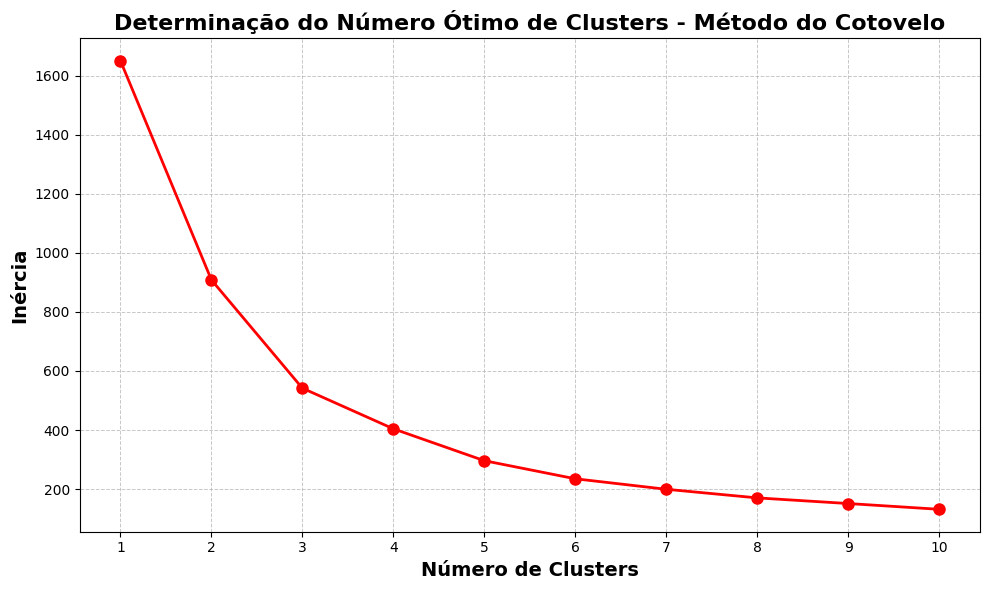

In [17]:
import matplotlib.pyplot as plt

# Plotar o método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='r', markersize=8, linewidth=2)

plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)

plt.xlabel('Número de Clusters', fontsize=14, fontweight='bold')
plt.ylabel('Inércia', fontsize=14, fontweight='bold')
plt.title('Determinação do Número Ótimo de Clusters - Método do Cotovelo', fontsize=16, fontweight='bold')

plt.xticks(range(1, 11))

plt.tight_layout()
plt.show()


In [18]:
# Ajustar o KMeans com o número de clusters escolhido
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=33)
y_pred = kmeans.fit_predict(data_pca)
y_pred

array([0, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 0,
       0, 2, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1,
       1, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 1, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 2, 2, 2,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 1, 0, 0, 0], dtype=int32)

In [19]:
# Adicionar rótulos de cluster aos dados originais
data['Cluster'] = kmeans.labels_

In [20]:
# CÁLCULO DA MÉTRICA SILHUETA

# Calcular e imprimir o silhouette score
silhouette = silhouette_score(data_pca, kmeans.labels_)
print("Silhouette Score:", silhouette)


Silhouette Score: 0.48142753233961777


In [21]:
##



In [22]:
# # Figura com o nome dos bairros

import plotly.express as px
import pandas as pd

data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

fig = px.scatter(data, x='PCA1', y='PCA2', color='Cluster', hover_name='NOME_UDH', size_max=10)
fig.update_layout(
    title='Clusters no espaço de Componentes Principais',
    xaxis_title='Componente Principal 1',
    yaxis_title='Componente Principal 2',
    font=dict(size=14)
)
# fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

## Fiz esse codigo abaixo para caso o tamanho atual esteja pequeno demais
fig.update_traces(
    marker=dict(size=12,
        line=dict(width=2, color='DarkSlateGrey')
    ),
    selector=dict(mode='markers')
)
fig.update_layout(margin=dict(l=20, r=20, t=60, b=20))
fig.show()



In [23]:
# TABULAÇÃO DOS BAIRROS EM CADA CLUSTER

from tabulate import tabulate
nomes_por_cluster = [[] for _ in range(n_clusters)]

for cluster in range(n_clusters):
    nomes_por_cluster[cluster] = list(data[data['Cluster'] == cluster]['NOME_UDH'])
tabela = []

for cluster, nomes in enumerate(nomes_por_cluster):
    tabela.append([f'Cluster {cluster}', '\n'.join(nomes)])

print(tabulate(tabela, headers=['Cluster', 'Bairros'], tablefmt='fancy_grid'))


╒═══════════╤══════════════════════════════════════════════════════════════╕
│ Cluster   │ Bairros                                                      │
╞═══════════╪══════════════════════════════════════════════════════════════╡
│ Cluster 0 │ Alagadiço I                                                  │
│           │ Jacareganga I                                                │
│           │ Farias Brito I                                               │
│           │ Vila Velha II                                                │
│           │ Jardim Guanabara II / Vila Velha III                         │
│           │ Vila Velha ( Rua seis e entorno )                            │
│           │ Vila Velha ( Condomínio Santíssima Trindade )                │
│           │ Carlito Pamplona I                                           │
│           │ Carlito Pamplona II                                          │
│           │ Jacarecanga II / Monte Castelo I                             │

# **CORRELAÇÕES**

In [24]:
# EXCLUINDO A COLUNA NOME_UDH PARA SER POSSÍVEL FAZER A CORRELAÇÃO (NA CORRELAÇÃO NÃO DEVE HAVER STRINGS)

data.drop(columns=['NOME_UDH'], inplace=True)
data.corr()

,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,...,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,Cluster,PCA1,PCA2
ESPVIDA,1.000000,-0.975785,-0.979782,-0.976757,0.914777,0.999362,-0.784662,0.479959,0.865393,-0.535199,...,0.569280,0.964689,0.927055,0.983151,0.954986,0.999988,0.948920,-0.684524,-9.689671e-01,1.831086e-01
FECTOT,-0.975785,1.000000,0.950445,0.940521,-0.880527,-0.976521,0.774813,-0.469076,-0.844550,0.514209,...,-0.538581,-0.946198,-0.905144,-0.958605,-0.934620,-0.975641,-0.920384,0.709189,9.419837e-01,-1.829267e-01
MORT1,-0.979782,0.950445,1.000000,0.998642,-0.976483,-0.975641,0.766139,-0.477974,-0.845031,0.539194,...,-0.546454,-0.933589,-0.904394,-0.944755,-0.929417,-0.979843,-0.888978,0.638101,9.381285e-01,-1.582581e-01
MORT5,-0.976757,0.940521,0.998642,1.000000,-0.976308,-0.972474,0.759186,-0.475866,-0.842777,0.536628,...,-0.541957,-0.929306,-0.899107,-0.942164,-0.924548,-0.976835,-0.889313,0.629854,9.361982e-01,-1.525927e-01
SOBRE40,0.914777,-0.880527,-0.976483,-0.976308,1.000000,0.906451,-0.712015,0.454390,0.786719,-0.526125,...,0.493437,0.857709,0.840271,0.862945,0.860331,0.914902,0.788967,-0.558073,-8.652725e-01,1.252891e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IDHM_L,0.999988,-0.975641,-0.979843,-0.976835,0.914902,0.999348,-0.784667,0.480189,0.864566,-0.535590,...,0.568512,0.964629,0.926726,0.982980,0.954783,1.000000,0.948693,-0.684328,-9.689287e-01,1.828555e-01
IDHM_R,0.948920,-0.920384,-0.888978,-0.889313,0.788967,0.949453,-0.746955,0.461568,0.836098,-0.496805,...,0.524393,0.931697,0.882233,0.974900,0.913641,0.948693,1.000000,-0.659006,-9.390186e-01,2.455129e-01
Cluster,-0.684524,0.709189,0.638101,0.629854,-0.558073,-0.688569,0.563746,-0.300426,-0.561114,0.383263,...,-0.396536,-0.680319,-0.627809,-0.679024,-0.658943,-0.684328,-0.659006,1.000000,7.809062e-01,3.457121e-01
PCA1,-0.968967,0.941984,0.938129,0.936198,-0.865273,-0.968774,0.787573,-0.452089,-0.852528,0.549497,...,-0.601485,-0.957230,-0.924181,-0.970757,-0.949860,-0.968929,-0.939019,0.780906,1.000000e+00,1.239214e-16


# COLUNAS SELECIONADAS PARA CORRELAÇÃO

* ESPVIDA - Esperança de vida ao nascer - Número médio de anos que as pessoas deverão viver a partir do nascimento, se permanecerem constantes ao longo da vida o nível e o padrão de mortalidade por idade prevalecentes no ano do Censo.
* MORT1 - Mortalidade até um ano de idade - Número de crianças que não deverão sobreviver ao primeiro ano de vida em cada 1000 crianças nascidas vivas.
* T_ANALF18M - Taxa de analfabetismo da população de 18 anos ou mais de idade - Razão entre a população de 18 anos ou mais de idade que não sabe ler nem escrever um bilhete simples e o total de pessoas nesta faixa etária, multiplicada por 100.
* T_FLMED_TUDO - Taxa de frequência líquida ao ensino   médio - Razão entre o número de pessoas na faixa etária de 15 a 17 anos frequentando o ensino médio regular seriado ou não seriado, Educação de Jovens e Adultos - EJA - ou supletivo do ensino médio, ou que já tenham concluído esse nível de ensino e a população total dessa mesma faixa etária, multiplicada por 100. As pessoas de 15 a 17 anos frequentando a 4ª série do ensino médio foram consideradas como já tendo concluído esse nível de ensino.
* T_FLSUPER - Taxa de frequência líquida ao ensino   superior - Razão entre o número de pessoas na faixa etária de 18 a 24 anos frequentando o ensino superior (graduação, especialização, mestrado ou doutorado) e a população total dessa mesma faixa etária, multiplicada por 100.
* GINI - Índice de Gini - Mede o grau de desigualdade existente na distribuição de indivíduos segundo a renda domiciliar per capita. Seu valor é 0 quando não há desigualdade (a renda domiciliar per capita de todos os indivíduos tem o mesmo valor) e tende a 1 à medida que a desigualdade aumenta.O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.
* PIND - Proporção de extremamente pobres - Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a RS 70,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.
* PMPOB - Proporção de pobres - Proporção dos indivíduos com renda domiciliar per capita igual ou inferior a R$ 140,00 mensais, em reais de agosto de 2010. O universo de indivíduos é limitado àqueles que vivem em domicílios particulares permanentes.
* RDPC - Renda per capita média - Razão entre o somatório da renda de todos os indivíduos residentes em domicílios particulares permanentes e o número total desses indivíduos. Valores em reais de 01/agosto de 2010.
* THEIL - Índice de Theil - L - Mede a desigualdade na distribuição de indivíduos segundo a renda domiciliar per capita, excluídos aqueles com renda domiciliar per capita nula. É o logaritmo da razão entre as médias aritmética e geométrica da renda domiciliar per capita dos indivíduos, sendo nulo quando não existir desigualdade de renda entre eles e tendente ao infinito quando a desigualdade tender ao máximo.
* P_FUND - Percentual dos ocupados com fundamental completo - Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas que já concluíram o ensino fundamental (regular seriado, regular não seriado, EJA ou supletivo) e o número total de pessoas ocupadas nessa faixa etária, multiplicada por 100.
* P_MED - Percentual dos ocupados com médio completo - Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas que já concluíram o ensino médio (regular seriado, regular não seriado, EJA ou supletivo) e o número total de pessoas ocupadas nessa faixa etária, multiplicada por 100. Foram consideradas como já tendo concluído o médio aquelas pessoas que frequentavam a 4ª série desse nível de ensino.
* P_SUPER - Percentual dos ocupados com superior completo - Razão entre o número de pessoas de 18 anos ou mais de idade ocupadas e que já concluíram a graduação do ensino superior e o número total de pessoas ocupadas nessa faixa etária, multiplicada por 100.
* RENOCUP - Rendimento médio dos ocupados - Média dos rendimentos de todos os trabalhos das pessoas ocupadas de 18 anos ou mais de idade. Valores em reais de agosto de 2010.
* T_AGUA - Percentual da população que vive em domicílios com água encanada - Razão entre a população que vive em domicílios particulares permanentes com água canalizada para um ou mais cômodos e a população total residente em domicílios particulares permanentes, multiplicada por 100. A água pode ser proveniente de rede geral, de poço, de nascente ou de reservatório abastecido por água das chuvas ou carro-pipa.
* T_LUZ - Percentual da população que vive em domicílios com energia elétrica - Razão entre a população que vive em domicílios particulares permanentes com iluminação elétrica e a população total residente em domicílios particulares permanentes, multiplicada por 100. Considera-se iluminação proveniente ou não de uma rede geral, com ou sem medidor.
* AGUA_ESGOTO - Percentual de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados - Razão entre as pessoas que vivem em domicílios cujo abastecimento de água não provem de rede geral e cujo esgotamento sanitário não é realizado por rede coletora de esgoto ou fossa séptica e a população total residente em domicílios particulares permanentes, multiplicada por 100. São considerados apenas os domicílios particulares permanentes.
* T_M10A17CF - Percentual de mulheres de 10 a 17 anos de idade que tiveram filhos - Razão entre as mulheres de 10 a 17 anos de idade que tiveram filhos e o total de mulheres nesta faixa etária, multiplicada por 100.
* T_NESTUDA_NTRAB_MMEIO - Percentual de pessoas de 15 a 24 anos que não estudam, não trabalham e são vulneráveis à pobreza, na população total dessa faixa etária - Razão entre as pessoas de 15 a 24 anos que não estudam, não trabalham e são vulneráveis à pobreza e a população total nesta faixa etária, multiplicada por 100. Definem-se como vulneráveis à pobreza as pessoas que moram em domicílios com renda per capita inferior a 1/2 salário mínimo de agosto de 2010. São considerados apenas os domicílios particulares permanentes.
* T_SLUZ - % de pessoas em domicílios sem energia elétrica - Razão entre as pessoas que vivem em domicílios sem energia elétrica e população total residente em domicílios particulares permanentes multiplicado por 100.
* PEA1014 - População economicamente ativa de 10 a 14 anos de idade - População economicamente ativa. Corresponde ao número de pessoas nessa faixa etária que, na semana de referência do Censo, encontravam-se ocupadas no mercado de trabalho ou que, encontrando-se desocupadas, tinham procurado trabalho no mês anterior à data da pesquisa.
* IDHM - Índice de Desenvolvimento Humano Municipal - Índice de Desenvolvimento Humano Municipal. Média geométrica dos índices das dimensões Renda, Educação e Longevidade, com pesos iguais.



In [25]:
# Correlação das colunas selecionadas (SELEÇÃO DE 21 COLUNAS QUE POSSIVELMENTE APRESENTARÁ INFORMAÇÕES IMPORTANTES)

colunas_correlacao = ['ESPVIDA', 'MORT1', 'T_ANALF18M', 'T_FLSUPER', 'GINI', 'PIND', 'PMPOB', 'RDPC', 'THEIL', 'P_FUND', 'P_MED', 'P_SUPER', 'RENOCUP', 'T_AGUA', 'T_LUZ', 'AGUA_ESGOTO', 'T_M10A17CF', 'T_NESTUDA_NTRAB_MMEIO', 'T_SLUZ', 'PEA1014', 'IDHM']
correlacoes = data[colunas_correlacao].corr()
correlacoes

,ESPVIDA,MORT1,T_ANALF18M,T_FLSUPER,GINI,PIND,PMPOB,RDPC,THEIL,P_FUND,...,P_SUPER,RENOCUP,T_AGUA,T_LUZ,AGUA_ESGOTO,T_M10A17CF,T_NESTUDA_NTRAB_MMEIO,T_SLUZ,PEA1014,IDHM
ESPVIDA,1.000000,-0.979782,-0.811019,0.893084,0.725115,-0.853785,-0.956792,0.758179,0.671354,0.970581,...,0.870775,0.760586,0.222445,0.339218,-0.559238,-0.570389,-0.941437,-0.339218,-0.411649,0.983151
MORT1,-0.979782,1.000000,0.791467,-0.810747,-0.696208,0.873661,0.967408,-0.674460,-0.633242,-0.948745,...,-0.783526,-0.675491,-0.224571,-0.308269,0.538740,0.536217,0.917088,0.308269,0.415783,-0.944755
T_ANALF18M,-0.811019,0.791467,1.000000,-0.721652,-0.554845,0.731548,0.792775,-0.605812,-0.505205,-0.818519,...,-0.703439,-0.612632,-0.366938,-0.345034,0.505533,0.490045,0.791890,0.345034,0.298208,-0.814258
T_FLSUPER,0.893084,-0.810747,-0.721652,1.000000,0.568623,-0.704946,-0.819277,0.825428,0.535465,0.893827,...,0.938620,0.835480,0.175647,0.379971,-0.509353,-0.547155,-0.869069,-0.379971,-0.337579,0.931659
GINI,0.725115,-0.696208,-0.554845,0.568623,1.000000,-0.434024,-0.587517,0.598864,0.977813,0.612161,...,0.639759,0.584400,0.215775,0.197587,-0.336560,-0.312415,-0.582012,-0.197587,-0.300543,0.691692
PIND,-0.853785,0.873661,0.731548,-0.704946,-0.434024,1.000000,0.939763,-0.537545,-0.359888,-0.861842,...,-0.651376,-0.544338,-0.186916,-0.214735,0.584370,0.487613,0.898163,0.214735,0.355527,-0.838000
PMPOB,-0.956792,0.967408,0.792775,-0.819277,-0.587517,0.939763,1.000000,-0.661630,-0.528027,-0.949726,...,-0.776567,-0.664094,-0.215722,-0.282685,0.569744,0.567467,0.940132,0.282685,0.377218,-0.939656
RDPC,0.758179,-0.674460,-0.605812,0.825428,0.598864,-0.537545,-0.661630,1.000000,0.632603,0.740661,...,0.950245,0.994713,0.182039,0.228653,-0.381536,-0.466506,-0.694301,-0.228653,-0.260437,0.824121
THEIL,0.671354,-0.633242,-0.505205,0.535465,0.977813,-0.359888,-0.528027,0.632603,1.000000,0.564567,...,0.645699,0.611910,0.203880,0.139912,-0.299333,-0.291002,-0.522260,-0.139912,-0.264778,0.653182
P_FUND,0.970581,-0.948745,-0.818519,0.893827,0.612161,-0.861842,-0.949726,0.740661,0.564567,1.000000,...,0.863497,0.750032,0.193145,0.345677,-0.549972,-0.565830,-0.947344,-0.345677,-0.383103,0.979613


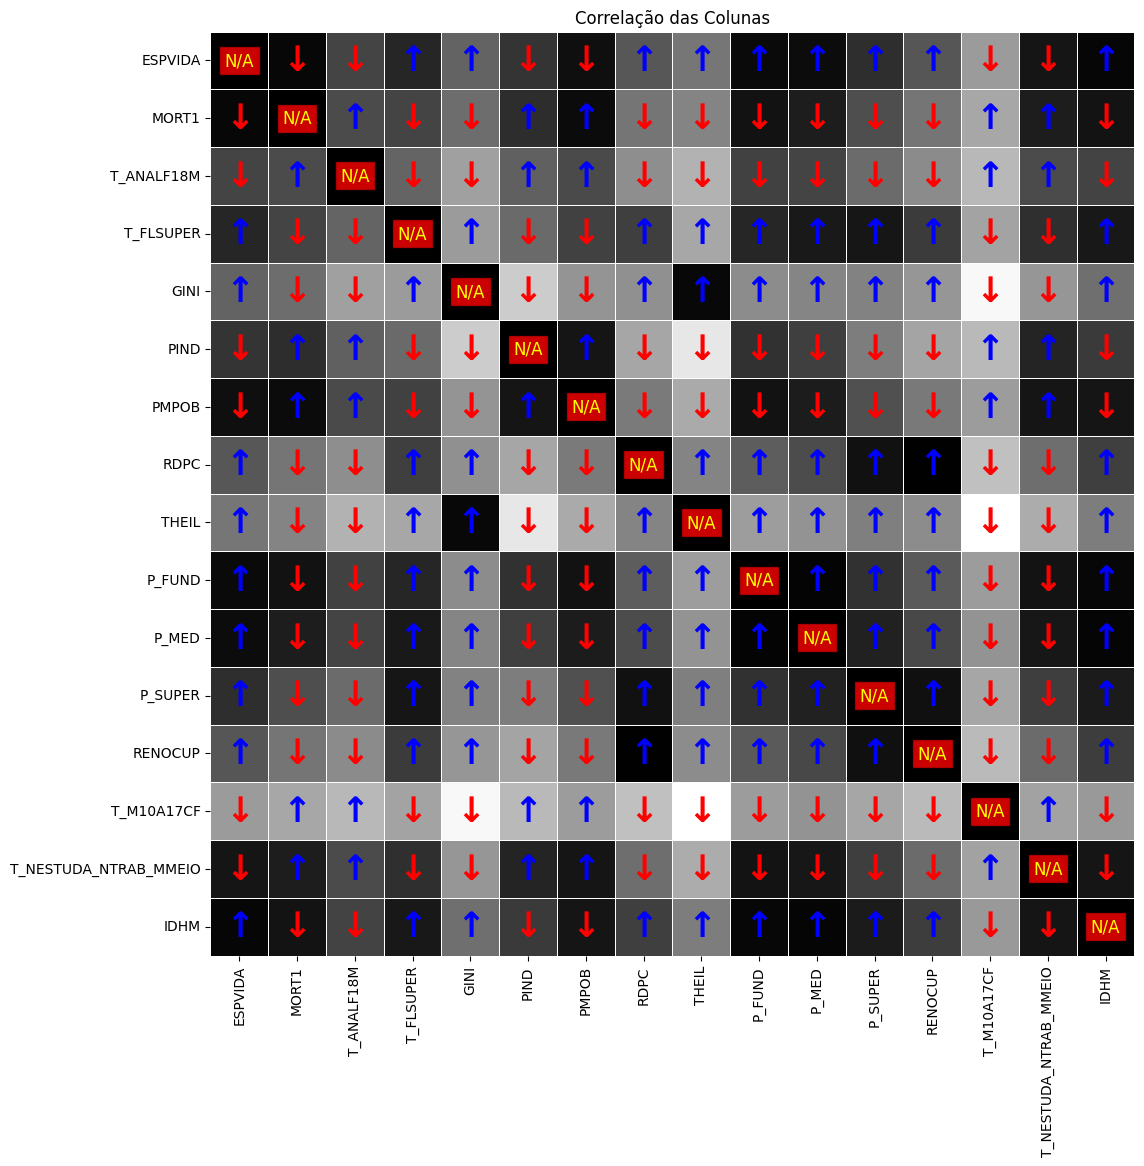

In [26]:
# PARA MELHOR VIZUALIZAÇÃO DA CORRELAÇÃO, FOI ADICIONADO SETAS NA COR AZUL(DIRETAMENTE PROPORCIONAL) E VERMELHO(INVERSAMENTE PROPORCIONA)
# COR DA CÉLULA PRETO - PROXIMO DE 1 (CORRELAÇÃO ALTA)
# COR DA CEÚLA BRANCO - PROXIMO DE 0 (CORRELAÇÃO BAIXA)
'''(ALTERAR) MELHORAR A VIZUALIZAÇÃO DO GRAFICO, MUDAR INDICE DOS LABELS'''

import seaborn as sns

# Correlação das colunas selecionadas # DELETANDO MAIS ALGUNS VALORES (NÃO APAGAR)
colunas_correlacao = ['ESPVIDA', 'MORT1', 'T_ANALF18M', 'T_FLSUPER', 'GINI', 'PIND', 'PMPOB', 'RDPC', 'THEIL', 'P_FUND', 'P_MED', 'P_SUPER', 'RENOCUP', 'T_M10A17CF', 'T_NESTUDA_NTRAB_MMEIO', 'IDHM']
correlacoes = data[colunas_correlacao].corr()
correlacoes

colors = ['red' if corr < 0 else 'blue' for corr in correlacoes.values.flatten()]

plt.figure(figsize=(15, 12))
sns.heatmap(correlacoes.abs(), annot=False, cmap='gray_r', linewidths=0.5, cbar=False, square=True)

for i in range(len(correlacoes)):
    for j in range(len(correlacoes)):
        if i != j:
            plt.text(j + 0.5, i + 0.5, u'\u2193' if correlacoes.values[i, j] < 0 else u'\u2191',
                     ha='center', va='center', color=colors[i * len(correlacoes) + j], fontsize=25, fontweight='bold')
        else:
            plt.text(j + 0.5, i + 0.5, 'N/A', ha='center', va='center', color='yellow', fontsize=12, bbox=dict(facecolor='red', alpha=0.8))

plt.title('Correlação das Colunas')
plt.show()


# DADOS ESTATÍSTICOS DESCRITIVOS EM CADA CLUSTER (MÉDIA, MEDIANA, , DESVIO PADRÃO, QUARTIL)

In [27]:
# Adicionar os componentes principais ao dataframe
data['Cluster'] = pd.DataFrame(y_pred)
data

,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,...,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,Cluster,PCA1,PCA2
0,79.90,1.25,8.8,10.23,96.85,89.17,33.53,8.98,11.90,0.35,...,100.00,0.864,0.874,0.874,0.871,0.915,0.837,0,-2.573962,0.987661
1,79.90,1.25,8.8,10.23,96.85,89.17,36.23,10.93,11.90,1.50,...,100.00,0.864,0.874,0.874,0.871,0.915,0.837,0,-2.872801,-0.095139
2,79.90,1.25,8.8,10.23,96.85,89.17,34.77,11.99,11.90,0.00,...,100.00,0.864,0.874,0.874,0.871,0.915,0.837,0,-2.925979,-0.265613
3,72.97,2.15,18.5,19.85,95.69,79.80,58.15,11.34,10.08,2.71,...,86.15,0.568,0.683,0.684,0.642,0.800,0.624,1,1.352738,-1.316138
4,69.92,2.60,26.7,28.72,93.83,75.94,49.71,3.36,9.59,5.78,...,83.39,0.536,0.625,0.641,0.594,0.749,0.592,2,3.281510,1.558630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,79.38,1.28,9.4,10.95,96.81,88.56,36.38,12.57,11.56,1.56,...,94.84,0.821,0.824,0.850,0.823,0.906,0.825,0,-2.348430,-0.475838
243,72.97,2.15,18.5,19.85,95.69,79.80,50.36,6.37,10.08,3.03,...,86.15,0.568,0.683,0.684,0.642,0.800,0.624,1,1.148116,-1.603847
244,76.90,1.35,12.6,14.62,96.51,85.03,36.05,8.41,11.26,2.65,...,81.69,0.750,0.780,0.788,0.770,0.865,0.734,0,-0.897168,0.037769
245,78.28,1.32,10.7,12.51,96.66,86.93,34.33,9.27,10.89,4.35,...,89.11,0.750,0.765,0.797,0.760,0.888,0.751,0,-1.285746,-0.756241


In [28]:
# ESTATÍSTICA DESCRITIVA DO CLUSTER 0
'''count - quantidade de "pontos" no cluster 0
  mean - média
  std - desvio padrão
  min - valor minimo
  max - valor maximo
  quartil(25-75)%
  quartil(50%) - mediana'''


cluster0 = data[data["Cluster"] == 0]
cluster0.describe()

,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,...,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,Cluster,PCA1,PCA2
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.0,120.000000,120.000000
mean,78.465167,1.333583,10.619583,12.367417,96.688000,87.147667,35.170000,7.521083,11.213583,1.579167,...,91.911833,0.790675,0.800675,0.826733,0.797050,0.891117,0.796875,0.0,-1.763943,0.015279
std,1.676531,0.160727,2.170489,2.510936,0.201693,2.270088,4.685315,3.256127,0.549086,1.515146,...,4.769896,0.068592,0.045193,0.049562,0.050393,0.027960,0.076448,0.0,1.017643,1.108792
min,75.240000,1.100000,7.300000,8.480000,96.300000,82.420000,16.300000,0.430000,10.080000,0.000000,...,81.690000,0.639000,0.695000,0.749000,0.688000,0.837000,0.683000,0.0,-3.707173,-1.183853
25%,76.960000,1.250000,8.800000,10.230000,96.510000,85.030000,32.637500,4.957500,10.880000,0.467500,...,88.950000,0.750000,0.765000,0.792000,0.760000,0.866000,0.738000,0.0,-2.585241,-0.625269
50%,78.990000,1.310000,9.850000,11.485000,96.750000,87.945000,35.335000,7.445000,11.120000,1.200000,...,91.300000,0.811000,0.789000,0.827000,0.778000,0.900000,0.781500,0.0,-1.870912,-0.374304
75%,79.900000,1.350000,12.600000,14.620000,96.850000,89.170000,37.857500,10.257500,11.710000,2.305000,...,94.840000,0.836000,0.824000,0.869000,0.823000,0.915000,0.837000,0.0,-0.950168,0.273160
max,81.270000,1.880000,15.000000,17.400000,97.010000,90.940000,48.060000,14.460000,12.760000,7.780000,...,100.000000,0.948000,0.878000,0.945000,0.901000,0.938000,1.000000,0.0,-0.012930,5.309295


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.



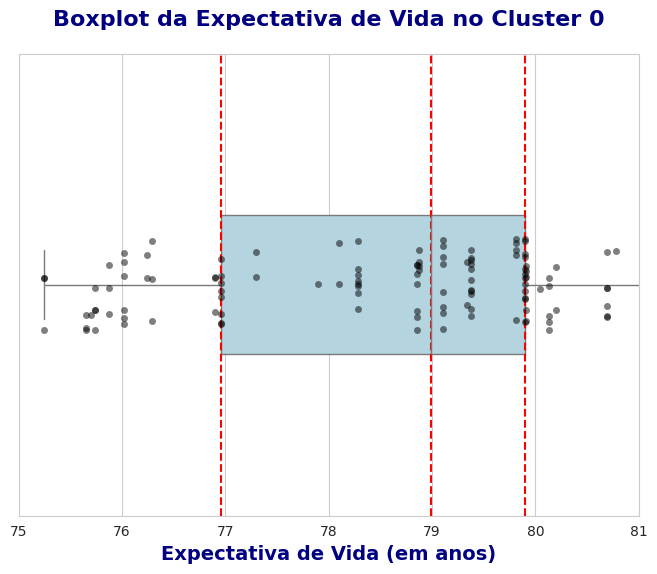

In [29]:
# GRÁFICO BOXPLOT
cluster0 = data[data["Cluster"] == 0]

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='ESPVIDA', data=cluster0, orient='v', color='lightblue', width=0.3)  # Boxplot
sns.stripplot(x='ESPVIDA', data=cluster0, orient='v', color='black', alpha=0.5, jitter=True)  # Pontos de dados

quartis = cluster0['ESPVIDA'].quantile([0.25, 0.5, 0.75])
for q in quartis:
    plt.axvline(x=q, color='red', linestyle='--', linewidth=1.5)

plt.xlim(75, 81)

plt.title('Boxplot da Expectativa de Vida no Cluster 0', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Expectativa de Vida (em anos)', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('')

plt.box(True)

plt.show()


In [30]:
# ESTATÍSTICA DESCRITIVA DO CLUSTER 1

cluster1 = data[data["Cluster"] == 1]
cluster1.describe()

,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,...,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,Cluster,PCA1,PCA2
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,...,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.0,83.000000,83.000000
mean,72.331325,2.179639,20.667470,22.300602,95.187590,78.980241,45.589277,5.193735,9.895663,3.423735,...,86.367590,0.543169,0.661735,0.673675,0.619145,0.789000,0.626542,1.0,1.507405,-1.267017
std,1.947921,0.197326,4.936798,5.223406,1.103271,2.455041,5.428878,2.046948,0.538125,2.600916,...,3.602518,0.072730,0.043953,0.039966,0.054910,0.032505,0.034639,0.0,0.947566,0.582349
min,68.310000,1.840000,14.300000,16.600000,92.700000,73.900000,30.310000,1.570000,9.000000,0.000000,...,78.310000,0.378000,0.561000,0.582000,0.492000,0.722000,0.554000,1.0,0.002420,-2.348146
25%,71.090000,2.020000,16.800000,18.050000,94.580000,77.420000,42.420000,3.600000,9.545000,1.860000,...,85.205000,0.534500,0.647000,0.663000,0.612000,0.768000,0.610000,1.0,0.919736,-1.653382
50%,72.970000,2.150000,18.500000,19.850000,95.690000,79.800000,44.710000,4.890000,9.840000,3.070000,...,86.150000,0.545000,0.666000,0.680000,0.621000,0.800000,0.624000,1.0,1.383770,-1.402532
75%,73.690000,2.240000,23.400000,25.100000,96.080000,80.710000,48.460000,6.605000,10.080000,4.685000,...,89.135000,0.595000,0.701000,0.704000,0.663000,0.812000,0.651000,1.0,2.056015,-0.928117
max,75.700000,2.600000,31.800000,34.170000,96.350000,83.420000,62.610000,11.340000,10.950000,16.250000,...,93.120000,0.666000,0.757000,0.749000,0.717000,0.845000,0.693000,1.0,3.972950,0.441126


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.



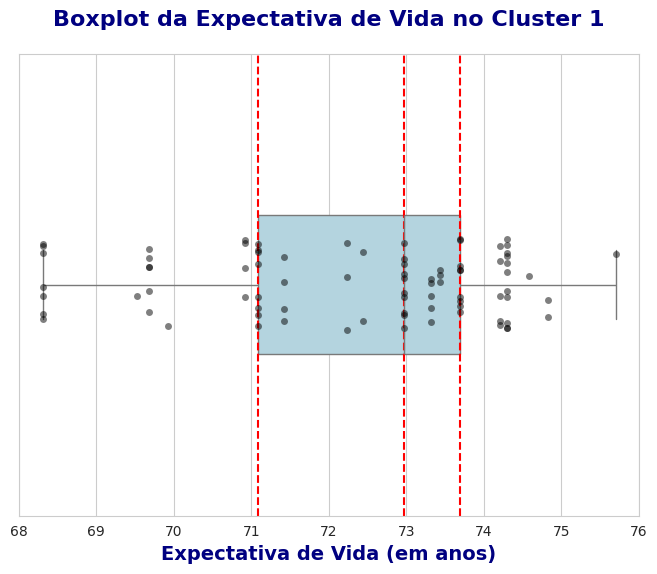

In [31]:
# GRAFICO BOXPLOT DO CLUSTER 1

cluster1 = data[data["Cluster"] == 1]

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='ESPVIDA', data=cluster1, orient='v', color='lightblue', width=0.3)  # Boxplot
sns.stripplot(x='ESPVIDA', data=cluster1, orient='v', color='black', alpha=0.5, jitter=True)  # Pontos de dados

quartis = cluster1['ESPVIDA'].quantile([0.25, 0.5, 0.75])
for q in quartis:
    plt.axvline(x=q, color='red', linestyle='--', linewidth=1.5)

plt.xlim(68, 76)

plt.title('Boxplot da Expectativa de Vida no Cluster 1', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Expectativa de Vida (em anos)', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('')

plt.box(True)

plt.show()





In [32]:
# ESTATÍSTICA DESCRITIVA DO CLUSTER 2

cluster2 = data[data["Cluster"] == 2]
cluster2.describe()

,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,...,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,Cluster,PCA1,PCA2
count,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0,44.000000,44.000000
mean,73.330682,2.006364,19.173636,21.065682,95.378864,80.315682,43.076591,5.748636,10.267727,3.421136,...,87.678636,0.591273,0.696364,0.702227,0.658682,0.805591,0.653705,2.0,1.967240,2.348384
std,2.896495,0.379498,6.033982,6.080091,1.203621,3.762269,4.304933,1.915171,0.753343,1.502428,...,5.476941,0.109670,0.070784,0.064645,0.083951,0.048276,0.065031,0.0,1.585642,1.209670
min,68.360000,1.230000,8.600000,9.990000,92.740000,73.970000,33.890000,3.240000,7.930000,1.020000,...,68.830000,0.351000,0.511000,0.567000,0.451000,0.723000,0.558000,2.0,-1.170178,0.358988
25%,70.820000,1.677500,14.147500,16.445000,94.417500,77.075000,39.275000,4.210000,9.737500,2.112500,...,84.530000,0.508750,0.635750,0.641750,0.590250,0.763750,0.600500,2.0,0.457676,1.329362
50%,73.505000,2.060000,17.200000,18.495000,95.975000,80.480000,42.590000,5.315000,10.135000,3.520000,...,87.835000,0.595500,0.699500,0.707500,0.663000,0.808500,0.644000,2.0,1.915577,2.270368
75%,75.795000,2.300000,24.075000,25.895000,96.360000,83.552500,46.715000,7.210000,10.760000,4.630000,...,90.922500,0.670000,0.758250,0.749750,0.719000,0.846750,0.697000,2.0,3.296479,3.130894
max,80.090000,2.600000,31.600000,34.010000,96.900000,89.450000,50.570000,10.770000,12.070000,6.580000,...,97.580000,0.861000,0.828000,0.888000,0.839000,0.918000,0.908000,2.0,5.011058,6.142122


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.



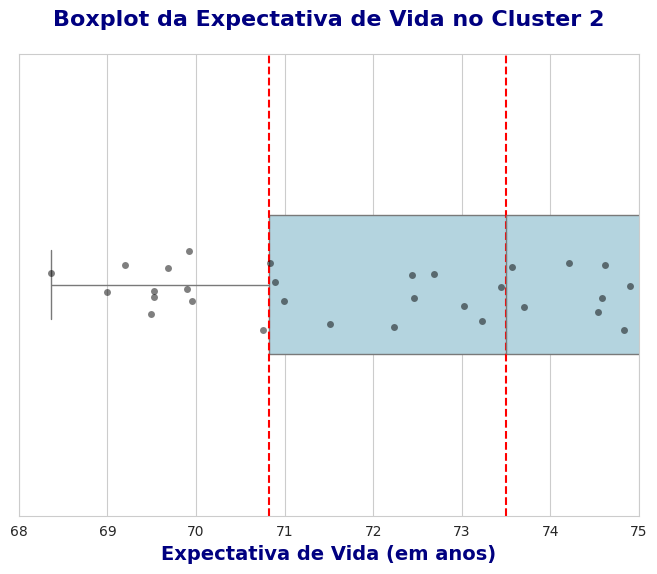

In [33]:
# GRAFICO BOXPLOT DO CLUSTER 2

cluster2 = data[data["Cluster"] == 2]

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='ESPVIDA', data=cluster2, orient='v', color='lightblue', width=0.3)  # Boxplot
sns.stripplot(x='ESPVIDA', data=cluster2, orient='v', color='black', alpha=0.5, jitter=True)  # Pontos de dados

quartis = cluster2['ESPVIDA'].quantile([0.25, 0.5, 0.75])
for q in quartis:
    plt.axvline(x=q, color='red', linestyle='--', linewidth=1.5)

plt.xlim(68, 75)

plt.title('Boxplot da Expectativa de Vida no Cluster 2', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Expectativa de Vida (em anos)', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('')

plt.box(True)

plt.show()


In [34]:
# ESTATÍSTICA DESCRITIVA DO CLUSTER 3

cluster3 = data[data["Cluster"] == 3]
cluster3.describe()

,ESPVIDA,FECTOT,MORT1,MORT5,SOBRE40,SOBRE60,RAZDEP,T_ENV,E_ANOSESTUDO,T_ANALF11A14,...,T_FUND11A13_tudo,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R,Cluster,PCA1,PCA2
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:1608: UserWarning:

Vertical orientation ignored with only `x` specified.



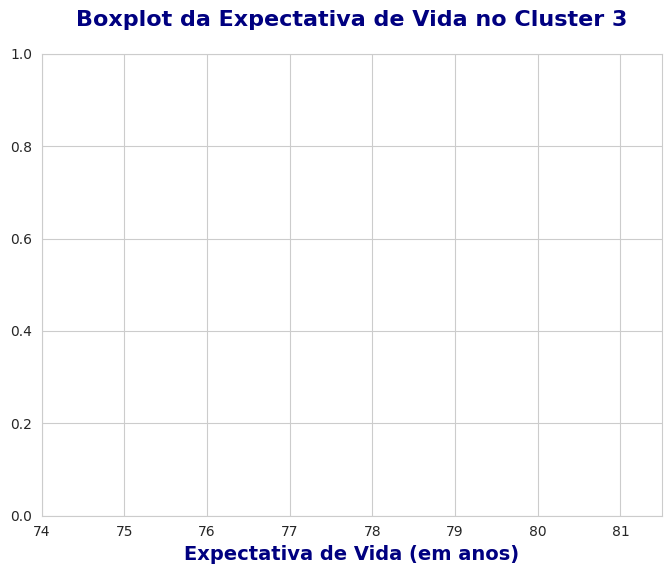

In [35]:
# GRAFICO BOXPLOT DO CLUSTER 3

cluster3 = data[data["Cluster"] == 3]

sns.set_style("whitegrid")

plt.figure(figsize=(8, 6))
sns.boxplot(x='ESPVIDA', data=cluster3, orient='v', color='lightblue', width=0.3)  # Boxplot
sns.stripplot(x='ESPVIDA', data=cluster3, orient='v', color='black', alpha=0.5, jitter=True)  # Pontos de dados

quartis = cluster3['ESPVIDA'].quantile([0.25, 0.5, 0.75])
for q in quartis:
    plt.axvline(x=q, color='red', linestyle='--', linewidth=1.5)

plt.xlim(74, 81.5)

plt.title('Boxplot da Expectativa de Vida no Cluster 3', fontsize=16, fontweight='bold', color='navy', pad=20)
plt.xlabel('Expectativa de Vida (em anos)', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('')

plt.box(True)

plt.show()
